# Análisis de Reseñas de un Hotel para la Extracción de Insights

La base de datos analizada posee los siguientes campos:

1. Date'
2. 'Name'
3. 'Loyalty Program'
4. 'ITR'
5. 'Overall Comment'
6. 'Elite Ap.'
7. 'Cleanliness'
8. 'Staff Service'
9. 'Maintenance and Upkeep'
10. 'F&B'
11. 'Reason for Brand Question Rating'
12. 'Restaurant 1 Service Satisfaction:'
13. 'Reason for Trip'
14. 'Overall Score'
15. 'Elite App.'
16. 'Social Comment'

### Importación de Bases de Datos

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path1 = '/content/drive/MyDrive/TESIS /datos/Responses_Export_Agosto2022_Agosto2024.xlsx'

In [ ]:
file_path2 = '/content/drive/MyDrive/TESIS /datos/Responses_Export_Enero2022_Agosto2022.xlsx'

In [ ]:
df1 = pd.read_excel(file_path1)

In [ ]:
df2 = pd.read_excel(file_path2)

In [ ]:
df = pd.concat([df1, df2], ignore_index=True)

## Análisis Preliminar

In [ ]:
df.columns

Index(['Date', 'Name', 'Loyalty Program', 'ITR', 'Overall Comment',
       'Elite Ap.', 'Cleanliness', 'Staff Service', 'Maintenance and Upkeep',
       'F&B', 'Reason for Brand Question Rating',
       'Restaurant 1 Service Satisfaction:', 'Reason for Trip',
       'Overall Score', 'Elite App.', 'Social Comment'],
      dtype='object')

In [ ]:
df.head()

,Date,Name,Loyalty Program,ITR,Overall Comment,Elite Ap.,Cleanliness,Staff Service,Maintenance and Upkeep,F&B,Reason for Brand Question Rating,Restaurant 1 Service Satisfaction:,Reason for Trip,Overall Score,Elite App.,Social Comment
0,2024-08-29 13:27:06,HECTOR,Member,10.0,"Excelente como siempre , la atención servicio ...",NaN,10.0,10.0,10.0,10,No hay dudas que la calidad y servicio son lo ...,10.0,Meeting,5.0,NaN,NaN
1,2024-08-28 16:18:09,OTTMAR,Gold,10.0,"Sehr gut , super Empfang ! Gratis Bier und Sna...",10.0,9.0,10.0,9.0,9,"Der zuvorkommende Mitarbeiter , besonders die ...",10.0,Meeting,5.0,NaN,NaN
2,2024-08-28 13:26:18,NaN,Silver,7.0,NaN,5.0,8.0,7.0,6.0,,The experience and maintenance were poorer com...,NaN,Meeting,3.5,NaN,NaN
3,2024-08-28 08:48:19,ADRIAN,Member,10.0,"Visitamos Buenos Aires de ""escapada"" con mi ...",NaN,10.0,10.0,10.0,10,NaN,NaN,Couple,5.0,NaN,NaN
4,2024-08-28 08:28:01,EMERSON,Member,10.0,"Ótima estada, hotel muito bem localizado e aco...",NaN,10.0,10.0,10.0,10,Tudo funcionou como planejado e acordado.,10.0,Family,5.0,NaN,NaN


In [ ]:
print(f"El dataset tiene {len(df)} filas y {len(df.columns)} columnas")

El dataset tiene 4376 filas y 16 columnas


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4376 entries, 0 to 4375
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Date                                4376 non-null   datetime64[ns]
 1   Name                                3169 non-null   object        
 2   Loyalty Program                     3472 non-null   object        
 3   ITR                                 3646 non-null   float64       
 4   Overall Comment                     2300 non-null   object        
 5   Elite Ap.                           1185 non-null   float64       
 6   Cleanliness                         3384 non-null   float64       
 7   Staff Service                       3382 non-null   float64       
 8   Maintenance and Upkeep              3381 non-null   float64       
 9   F&B                                 3267 non-null   object        
 10  Reason for Brand Questio

In [ ]:
df.drop(columns=['Elite App.'], inplace=True)

In [ ]:
df['Name'].nunique()

1419

In [ ]:
df['Name'].value_counts().head()

,count
Name,
MARIA,66
CARLOS,44
JOSE,40
JUAN,31
JORGE,26


In [ ]:
df['Name'].duplicated().sum()

2956

In [ ]:
df['Loyalty Program'].unique()

array(['Member', 'Gold', 'Silver', 'Non-Member', 'Platinum', 'Titanium',
       'Ambassador', nan], dtype=object)

In [ ]:
df['Loyalty Program'].value_counts()

,count
Loyalty Program,
Member,1299
Non-Member,765
Gold,474
Silver,314
Titanium,314
Platinum,249
Ambassador,57


In [ ]:
df['Reason for Trip'].unique()

array(['Meeting', 'Couple', 'Family', 'Conference/Convention',
       'Business Individual', 'Leisure Individual', nan, 'Friends',
       'Event/Wedding'], dtype=object)

In [ ]:
df['Reason for Trip'].value_counts()

,count
Reason for Trip,
Couple,1037
Business Individual,521
Family,450
Meeting,364
Leisure Individual,354
Conference/Convention,327
Friends,201
Event/Wedding,65


In [ ]:
df['F&B'] = pd.to_numeric(df['F&B'], errors='coerce')
df['F&B'].astype(float)

,F&B
0,10.0
1,9.0
2,NaN
3,10.0
4,10.0
...,...
4371,NaN
4372,NaN
4373,NaN
4374,NaN


In [ ]:
df.describe().round(2)

,Date,ITR,Elite Ap.,Cleanliness,Staff Service,Maintenance and Upkeep,F&B,Restaurant 1 Service Satisfaction:,Overall Score
count,4376,3646.00,1185.00,3384.00,3382.00,3381.00,3252.00,1769.00,2780.00
mean,2023-02-21 09:22:07.361435648,8.17,8.53,8.95,8.87,8.16,8.33,8.86,4.19
min,2021-12-31 22:22:42,0.50,1.00,1.00,1.00,1.00,1.00,1.00,0.50
25%,2022-06-25 18:16:57.750000128,7.00,8.00,8.00,9.00,7.00,8.00,8.00,4.00
50%,2023-01-18 06:59:45.500000,9.00,10.00,10.00,10.00,9.00,9.00,10.00,4.75
75%,2023-09-27 13:20:54,10.00,10.00,10.00,10.00,10.00,10.00,10.00,5.00
max,2024-08-29 13:27:06,10.00,10.00,10.00,10.00,10.00,10.00,10.00,5.00
std,NaN,2.54,2.40,1.71,2.01,2.32,2.08,1.77,1.21


### Visualización de Porcentaje de datos nulos

In [ ]:
print("Porcentaje de nulos por variable en df:")
(df.isnull().sum().sort_values()/len(df))*100

Porcentaje de nulos por variable en df:


,0
Date,0.000000
ITR,16.681901
Loyalty Program,20.658135
Cleanliness,22.669104
Staff Service,22.714808
Maintenance and Upkeep,22.737660
Reason for Trip,24.154479
F&B,25.685558
Name,27.582267
Overall Score,36.471664


## Procesamiento de Variables

### Procesamiento de Puntajes o Variables Numéricas

El primer paso será rellenar los puntajes que presentan nulos por la mediana que otorga mayor robustez teniendo en cuenta que la mayoría de los puntajes son altos y unos pocos muestran valores bajos. Es decir, es más representativa de las tendencias generales sin ser afectada por valores atípicos ocasionales.

In [ ]:
# Numericas
variables_numericas = df.select_dtypes(include=['int', 'float'])
print("Veamos las variables numéricas del dataset:")
for columna in variables_numericas.columns:
    print(f"- {columna}")

Veamos las variables numéricas del dataset:
- ITR
- Elite Ap.
- Cleanliness
- Staff Service
- Maintenance and Upkeep
- F&B
- Restaurant 1 Service Satisfaction:
- Overall Score


In [ ]:
columns_to_fill = [
    'ITR',
    'Elite Ap.',
    'Cleanliness',
    'Staff Service',
    'Maintenance and Upkeep',
    'F&B',
    'Restaurant 1 Service Satisfaction:'
]

# Rellenar los valores nulos con la mediana de cada columna
for col in columns_to_fill:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

<ipython-input-22-3e732d399cb8>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


Para rellenar el overall scroe, hare un promedio simple de los puntajes de:
* 'Cleanliness',
* 'Staff Service',
* 'Maintenance and Upkeep',
* 'F&B'


Ya que este puntaje general está compuesto por la suma ponderada de ellos. El objetivo es preservar lo mejor posible los valores que arroja la muestra para que el análisis sea enriquecedor.

In [ ]:

def fill_overall_score(df):
    required_columns = ['Cleanliness', 'Staff Service', 'Maintenance and Upkeep', 'F&B']
    if not all(col in df.columns for col in required_columns):
      raise ValueError(f"El DataFrame no contiene todas las columnas requeridas: {required_columns}")

    # Calcular 'Overall Score' solo si es nulo
    df['Overall Score'] = df.apply(
        lambda row: row['Overall Score']
        if pd.notnull(row['Overall Score'])
        else (row['Cleanliness'] / 2 + row['Staff Service'] / 2 + row['Maintenance and Upkeep'] / 2 + row['F&B'] / 2) / 4
        if all(pd.notnull(row[col]) for col in required_columns)
        else None,
        axis=1
    )

    return df


In [ ]:
df = fill_overall_score(df)

### Procesamiento de Variables Categóricas

In [ ]:
# Objeto
df.select_dtypes(include=['object'])
variables_categoricas = df.select_dtypes(include=['object'])
print("Veamos las variables categoricas del dataset:")
for columna in variables_categoricas.columns:
    print(f"- {columna}")

Veamos las variables categoricas del dataset:
- Name
- Loyalty Program
- Overall Comment
- Reason for Brand Question Rating
- Reason for Trip
- Social Comment


En el caso de los comentarios, los nulos se completarán con desconocido o sin comentarios en donde aplique. El resto de las variables de tipo object se completarán con la moda.

In [ ]:
df['Reason for Trip'] = df['Reason for Trip'].replace(np.nan, 'Couple')

In [ ]:
df['Reason for Brand Question Rating'] = df['Reason for Brand Question Rating'].replace(np.nan, 'Unknown')

In [ ]:
df["Overall Comment"] = df["Overall Comment"].replace(np.nan, "-")

In [ ]:
for column in df.select_dtypes(include='object'):
    mode_value = df[column].mode()[0]  # Calcular la moda
    df[column] = df[column].replace(np.nan, mode_value)  # Reemplazar valores faltantes con la moda

In [ ]:
print("Porcentaje de nulos por variable en df:")
(df.isnull().sum().sort_values()/len(df))*100

Porcentaje de nulos por variable en df:


,0
Date,0.0
Name,0.0
Loyalty Program,0.0
ITR,0.0
Overall Comment,0.0
Elite Ap.,0.0
Cleanliness,0.0
Staff Service,0.0
Maintenance and Upkeep,0.0
F&B,0.0


## Análisis Exploratoio - EDA


#### Creación de nuevas variables

In [ ]:
df['Comment_Length'] = df['Overall Comment'].apply(lambda x: len(str(x).split()))


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Year-Month'] = df['Date'].dt.to_period('M')

In [ ]:
df = df.drop(df[df['Year'] == 2021].index)

In [ ]:
df['Season'] = df['Month'].apply(lambda x:
    'Verano' if x in [12, 1, 2] else  # Diciembre, Enero, Febrero
    'Otoño' if x in [3, 4, 5] else  # Marzo, Abril, Mayo
    'Invierno' if x in [6, 7, 8] else  # Junio, Julio, Agosto
    'Primavera' if x in [9, 10, 11] else  # Septiembre, Octubre, Noviembre
    None  # Para manejar cualquier valor inesperado
)

print(df['Season'].value_counts())

Season
Invierno     1364
Otoño        1327
Verano        982
Primavera     702
Name: count, dtype: int64


### Análisis de la Información

In [ ]:
service_by_trip_reason = df.groupby('Reason for Trip')[['Staff Service', 'Cleanliness', 'F&B', 'Overall Score', 'ITR']].mean()
print(service_by_trip_reason)


                       Staff Service  Cleanliness       F&B  Overall Score  \
Reason for Trip                                                              
Business Individual         8.712092     8.786948  8.092131       4.100528   
Conference/Convention       9.036697     9.244648  8.602446       4.350917   
Couple                      9.433349     9.464405  8.676541       4.472647   
Event/Wedding               9.092308     9.169231  8.615385       4.201923   
Family                      8.842222     8.928889  8.442222       4.185833   
Friends                     8.781095     8.925373  8.333333       4.133085   
Leisure Individual          8.909605     8.957627  8.341808       4.225989   
Meeting                     8.802198     8.769231  8.324176       4.153503   

                            ITR  
Reason for Trip                  
Business Individual    8.145873  
Conference/Convention  8.672783  
Couple                 8.291687  
Event/Wedding          8.307692  
Family         

In [ ]:
trip_reason_by_month = df.groupby(['Year', 'Reason for Trip']).size().unstack(fill_value=0)
print(trip_reason_by_month)


Reason for Trip  Business Individual  Conference/Convention  Couple  \
Year                                                                  
2022                             196                    105    1288   
2023                             216                    193     518   
2024                             109                     29     287   

Reason for Trip  Event/Wedding  Family  Friends  Leisure Individual  Meeting  
Year                                                                          
2022                        21     152       61                 131      129  
2023                        30     218       88                 146      144  
2024                        14      80       52                  77       91  


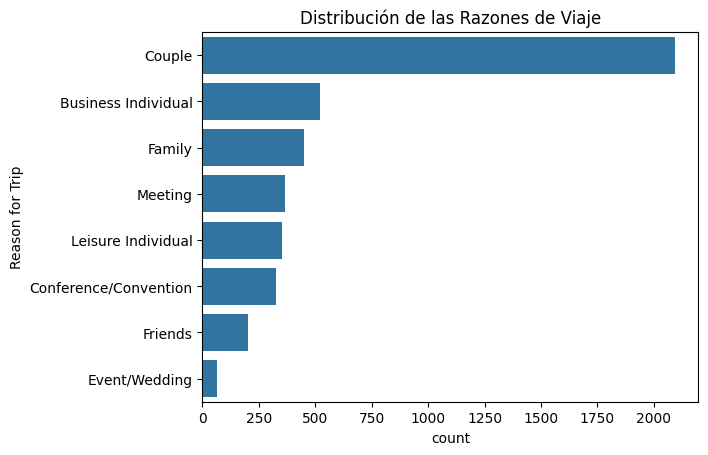

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(y='Reason for Trip', data=df, order=df['Reason for Trip'].value_counts().index)
plt.title('Distribución de las Razones de Viaje')
plt.show()


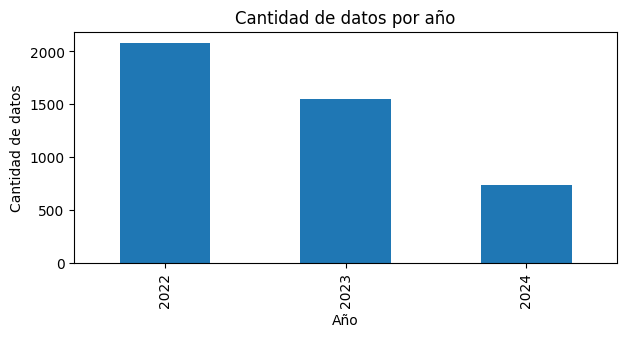

In [ ]:

# Contar la cantidad de datos por año
data_per_year = df['Year'].value_counts().sort_index()

# Graficar los resultados
plt.figure(figsize=(7, 3))
data_per_year.plot(kind='bar')
plt.title('Cantidad de datos por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de datos')
plt.show()



In [ ]:
df['Service_Quality'] = df[['Staff Service', 'Cleanliness', 'Maintenance and Upkeep', 'F&B']].mean(axis=1)


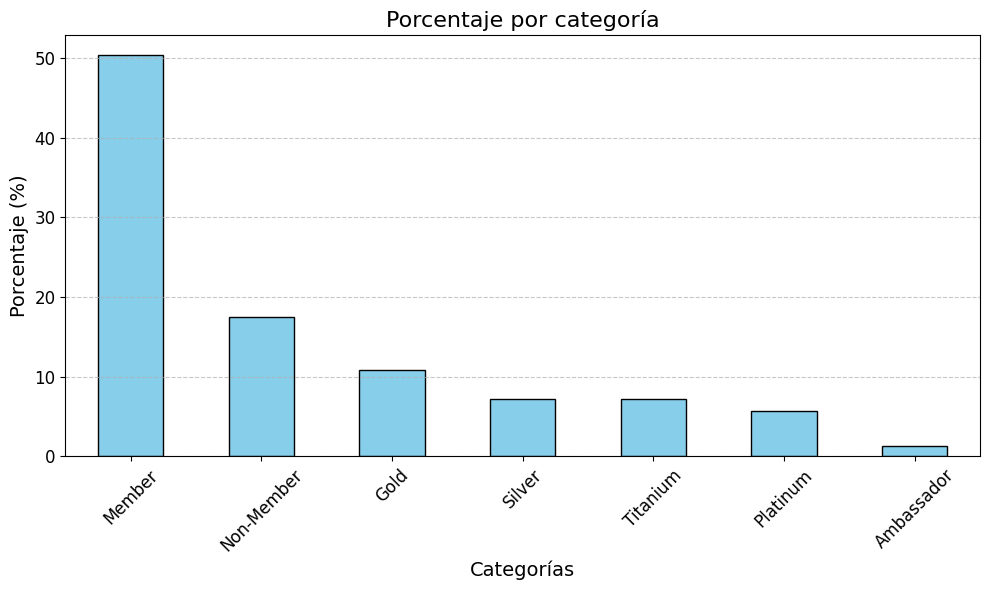

In [ ]:

# Calcula los porcentajes de cada categoría
category_percentages = df['Loyalty Program'].value_counts(normalize=True) * 100

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
category_percentages.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Porcentaje por categoría', fontsize=16)
plt.xlabel('Categorías', fontsize=14)
plt.ylabel('Porcentaje (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

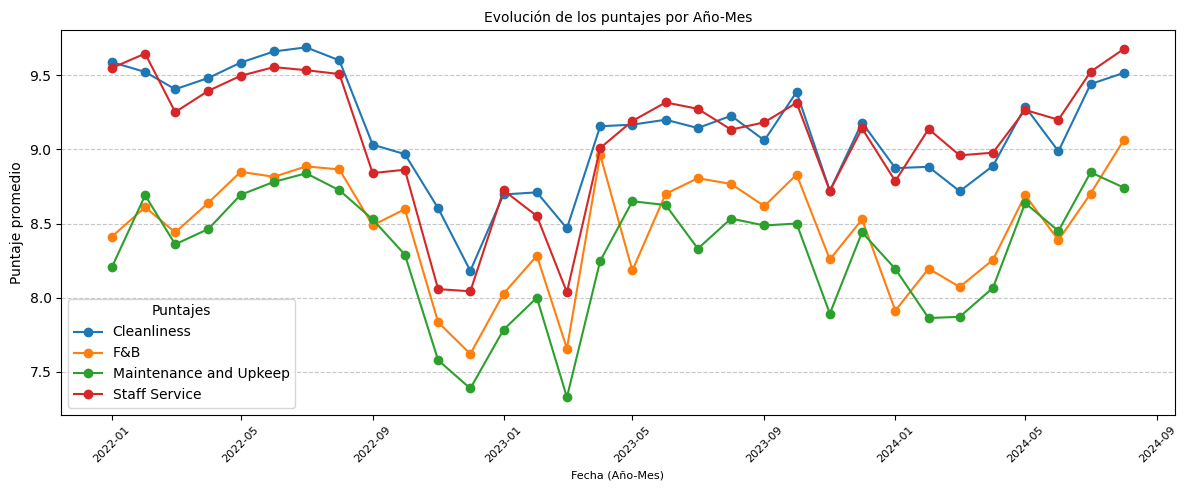

In [ ]:
grouped = df.groupby('Year-Month')[['Cleanliness', 'F&B','Maintenance and Upkeep', 'Staff Service']].mean()

# Crea el gráfico
plt.figure(figsize=(12, 5))

for column in ['Cleanliness', 'F&B','Maintenance and Upkeep', 'Staff Service']:
    plt.plot(grouped.index.to_timestamp(), grouped[column], marker='o', label=column)

# Personalizar el gráfico
plt.title('Evolución de los puntajes por Año-Mes', fontsize=10)
plt.xlabel('Fecha (Año-Mes)', fontsize=8)
plt.ylabel('Puntaje promedio', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Puntajes', fontsize=10)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

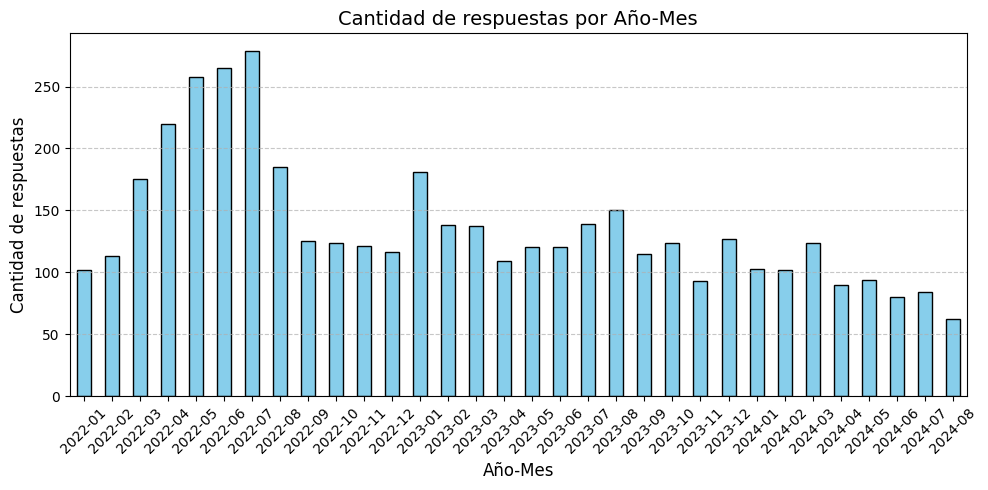

In [ ]:
data_per_year_month = df['Year-Month'].value_counts().sort_index()

# Graficar los resultados
plt.figure(figsize=(10, 5))  # Ajusta el tamaño del gráfico
data_per_year_month.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cantidad de respuestas por Año-Mes', fontsize=14)
plt.xlabel('Año-Mes', fontsize=12)
plt.ylabel('Cantidad de respuestas', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

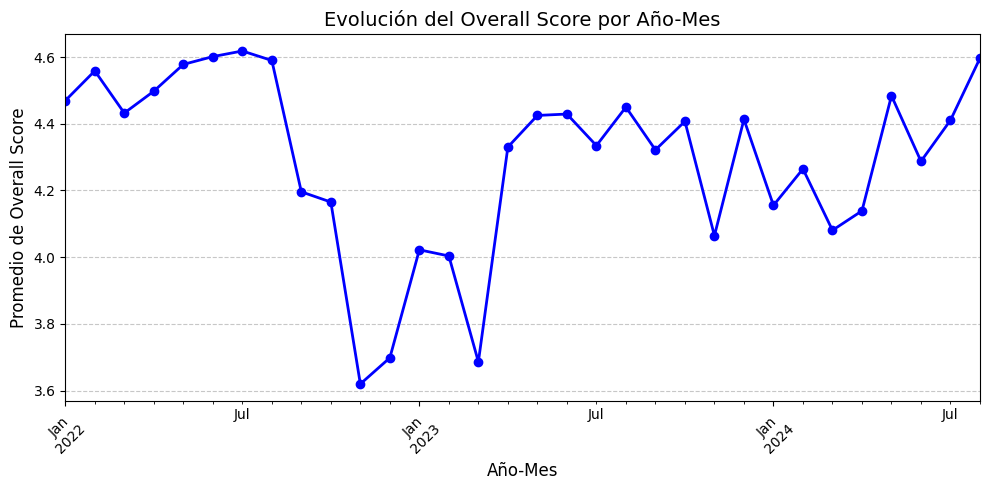

In [ ]:
average_score_per_month = df.groupby('Year-Month')['Overall Score'].mean().sort_index()

# Graficar los resultados
plt.figure(figsize=(10, 5))  # Ajusta el tamaño del gráfico
average_score_per_month.plot(kind='line', marker='o', color='blue', linewidth=2)
plt.title('Evolución del Overall Score por Año-Mes', fontsize=14)
plt.xlabel('Año-Mes', fontsize=12)
plt.ylabel('Promedio de Overall Score', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

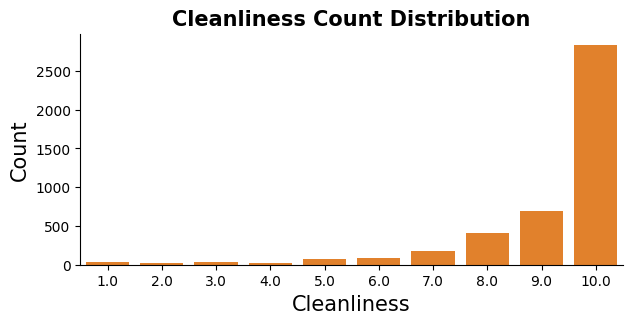

In [ ]:
variable = 'Cleanliness'

fig, ax = plt.subplots()
fig.set_size_inches(7, 3)
sns.countplot(x = f'{variable}', data = df)
sns.countplot(x=variable, data=df, ax=ax)
ax.set_xlabel(f'{variable}', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title(f'{variable} Count Distribution', fontsize=15, weight="bold")
sns.despine()

Como se observó en los gráficos creados anteriormente, la mayor cantidad de información proviene del año 2022. Si bien, por fuentes internas del establecimiento, es de conocimiento que no ha sido el año de mayor ocupación del hotel, por alguna razón fue el año que más personas respondieron voluntariamente la encuesta a comparación de los años siguientes.
En términos de análisis de la información general, la cantidad de respuestas promedio por mes ronda las 100, habiendo picos que superaron las 150 respuestas en los meses de Marzo a Agosto de 2022 y Enero 2023. Los puntajes otorgados a las diferentes categorías son altos, lo que indicaría una tasa alta de conformidad con el servicio prestado en todo sentido. No se observa una categoría con un desempeño más destacado que otro.

En términos de motivo de viaje, las dos categorías que más se destacan son los viajes de pareja y los de negocio, contemplando tanto motivos de conferencias, de negocios individual o reuniones. Los meses de mayor volumen de respuestas fueron los comprendidos en las estaciones de invierno y otoño. Dentro del marco de los viajeros frecuentes de la cadena, tan solo el 20% indica no ser miembro de este programa de fidelización. Dentro de los miembros, el orden de mayor a menor frecuencia de las subcategorías presentes es Gold, Silver, Titanium, Platinum, Ambassador.


En el año 2022, particularmente en el segundo semestre, se registró una pronunciada caída del Overall Score. Afortunadamente, en los meses subsiguientes la situación se revirtió, regresando a la normalidad.

## Preparación para el análisis NLP

In [ ]:
df_comments = df.copy()

Primero vamos a traducir al inglés todos los comentarios disponibles ya que figuran en al menos 3 idiomas: Español, Inglés y Portugues

1. Basado en XLM-RoBERTa
Este modelo utiliza XLM-RoBERTa, una arquitectura robusta basada en Transformers optimizada para tareas de lenguaje en múltiples idiomas. XLM-RoBERTa es una versión multilingüe de RoBERTa entrenada con grandes cantidades de datos no supervisados en más de 100 idiomas, lo que le permite manejar una variedad amplia de lenguajes con alta precisión.

2. Especializado en Detección de Idiomas
El modelo está ajustado específicamente para la tarea de detección de idiomas. Esto significa que:

Está optimizado para identificar correctamente el idioma predominante en un texto, incluso en fragmentos cortos o con ruido (como abreviaturas, errores tipográficos o jerga común en comentarios).
Ofrece resultados confiables en textos breves, como comentarios, donde los modelos generalistas pueden fallar.

In [ ]:
from transformers import pipeline

# Cargar el pipeline de detección de idioma
language_detector = pipeline("text-classification", model="papluca/xlm-roberta-base-language-detection")

def detect_language(comment):
    if not isinstance(comment, str) or comment.strip() == "":
        return None  # Devolver None para comentarios vacíos o no válidos
    result = language_detector(comment[:512])  # Limitar a 512 caracteres por restricción del modelo
    return result[0]['label']  # Devolver el código del idioma detectado


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Como ya no aporta al análisis quedarnos con los registros que no presentan comentarios, antes de comenzar a analizar los mismos, filtraremos los que se completaron con "-" para hacer el análisis de lso puntajes con la mayor cantidad de datos posibles.

In [ ]:
df_comments = df_comments[df_comments['Overall Comment'] != '-']

In [ ]:
df_comments["Overall Comment"] = df_comments["Overall Comment"].astype(str)

<ipython-input-56-f58798a94d31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comments["Overall Comment"] = df_comments["Overall Comment"].astype(str)


In [ ]:
# Detectar idioma para cada comentario
df_comments['Detected_Language'] = df_comments['Overall Comment'].apply(detect_language)

In [ ]:
df_comments['Detected_Language'].value_counts()

,count
Detected_Language,
en,1095
es,1009
pt,130
de,18
it,16
fr,14
ja,5
ur,3
ru,3


Ahora pasaremos a traducir los comentarios para homogenizar la muestra a un mismo idioma y que sea más sencillo tratar los comentarios. Por una cuestión de legibilidad, se decidió traducir todos los textos al inglés.

Para ello, se aplicará la API de Google para hacer las traducciones necesarias por los siguientes motivos:

* Escalabilidad: La API de Google Translation está diseñada para manejar grandes volúmenes de texto de manera eficiente. Si tienes cientos o miles de comentarios que traducir, la infraestructura de Google está optimizada para gestionar grandes cargas de trabajo sin comprometer la velocidad o la disponibilidad.

* Distribución Global: Google ofrece una infraestructura distribuida globalmente, lo que significa que las solicitudes se manejan desde servidores cercanos a tu ubicación, minimizando la latencia y acelerando el proceso de traducción.

* Rendimiento: Google Cloud proporciona alta disponibilidad y tiempos de respuesta rápidos, lo cual es crucial cuando se trabaja con un conjunto de datos grande, como en el caso de la traducción de miles de comentarios.

* API Sencilla de Usar: La API de Google Translation es fácil de integrar y usar. Con unas pocas líneas de código, puedes traducir automáticamente grandes volúmenes de texto sin tener que preocuparte por el procesamiento o la configuración de servidores de traducción complejos.

* Soporte Multilingüe: Google Translation soporta más de 100 idiomas, lo que te permite traducir una amplia variedad de comentarios sin tener que implementar soluciones específicas para cada idioma. La detección automática de idioma y la traducción al inglés, como en tu caso, es una característica integrada que simplifica aún más el proceso.

* Soporte para Caracteres Especiales: Google Translation maneja correctamente los caracteres especiales, emojis, y texto en varios alfabetos sin perder calidad en la traducción. Esto es especialmente útil si estás trabajando con comentarios que incluyen emojis o caracteres no latinos (como chino, árabe, etc.).

* Adaptabilidad al Contexto: Aunque la traducción automática no siempre es perfecta, la API de Google Translation ha sido entrenada con un vasto conjunto de datos y puede proporcionar traducciones precisas incluso en textos informales o de uso cotidiano, lo cual es útil en comentarios de clientes o usuarios.

In [ ]:
!pip install google-cloud-translate

In [ ]:
import os
from google.cloud import translate_v2 as translate

# Autenticar usando la clave JSON
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/content/drive/MyDrive/TESIS /datos/trabajo-final-zubillaga-442014-4f67ffec6189.json"

# Inicializar cliente de traducción
translate_client = translate.Client()


In [ ]:
from google.cloud import translate_v2 as translate

# Inicializar cliente de Google Cloud Translation
translate_client = translate.Client()


# Función para traducir un comentario si no está en inglés
def translate_if_not_english(row, comment_col="Overall Comment", target_lang="en"):
    # Obtener el comentario de la fila
    comment = row[comment_col]

    # Verifica si el texto ya está en inglés, si no, lo traduce
    if translate_client.detect_language(comment)['language'] != target_lang:
        result = translate_client.translate(comment, target_language=target_lang)
        return result['translatedText']
    return comment

In [ ]:
df_comments['Translated Overall Comment'] = df_comments.apply(translate_if_not_english, axis=1)

In [ ]:
df_comments.head()

,Date,Name,Loyalty Program,ITR,Overall Comment,Elite Ap.,Cleanliness,Staff Service,Maintenance and Upkeep,F&B,...,Overall Score,Social Comment,Comment_Length,Month,Year,Year-Month,Season,Service_Quality,Detected_Language,Translated Overall Comment
0,2024-08-29 13:27:06,HECTOR,Member,10.0,"Excelente como siempre , la atención servicio ...",10.0,10.0,10.0,10.0,10.0,...,5.0,Excelente,16,8,2024,2024-08,Invierno,10.00,es,"Excellent as always, the attention, service, c..."
1,2024-08-28 16:18:09,OTTMAR,Gold,10.0,"Sehr gut , super Empfang ! Gratis Bier und Sna...",10.0,9.0,10.0,9.0,9.0,...,5.0,Excelente,14,8,2024,2024-08,Invierno,9.25,de,"Very good, great reception! Free beer and snac..."
3,2024-08-28 08:48:19,ADRIAN,Member,10.0,"Visitamos Buenos Aires de ""escapada"" con mi ...",10.0,10.0,10.0,10.0,10.0,...,5.0,Excelente,43,8,2024,2024-08,Invierno,10.00,es,My wife and I visited Buenos Aires for a weeke...
4,2024-08-28 08:28:01,EMERSON,Member,10.0,"Ótima estada, hotel muito bem localizado e aco...",10.0,10.0,10.0,10.0,10.0,...,5.0,Excelente,8,8,2024,2024-08,Invierno,10.00,pt,"Great stay, very well located and cozy hotel."
5,2024-08-28 08:07:10,JORDANA,Member,9.0,Hotel muito bom e atendentes agradáveis.,10.0,10.0,10.0,10.0,9.0,...,4.5,Excelente,6,8,2024,2024-08,Invierno,9.75,pt,Very good hotel and pleasant staff.


In [ ]:
df_comments['Translated Overall Comment'][0]

'Excellent as always, the attention, service, cleaning, common areas, gastronomy!! Everything 10 points'

In [ ]:
df_comments.to_csv('df_comments.csv', index=False)

In [ ]:
df_final = df_comments.copy()

# Análisis NLP

## Clasificación de Sentimientos

### Modelo 1: Aplicación de RoBERTa

El modelo cardiffnlp/twitter-roberta-base-sentiment es ideal para analizar y clasificar comentarios en tres categorías de sentimiento (positivo, neutral y negativo) debido a las siguientes razones:

1. Especialización en Sentimiento:
El modelo fue entrenado específicamente en el análisis de sentimientos en texto, lo que lo hace altamente eficiente para identificar y clasificar emociones en comentarios, como los que se generan en los hoteles.
Fue ajustado en datos de redes sociales, como Twitter, lo que le permite manejar de manera efectiva el lenguaje informal, coloquial y diversas expresiones que comúnmente se encuentran en los comentarios de los usuarios.
2. Modelo Preentrenado y Listo para Usar:
Utiliza RoBERTa, una variante mejorada de BERT, que ha demostrado ser superior a otros modelos para tareas de clasificación de texto. Gracias a su arquitectura de transformadores, es capaz de entender las dependencias contextuales dentro de los comentarios de manera más precisa.
Al ser un modelo preentrenado, no es necesario realizar un proceso de entrenamiento desde cero, lo que reduce significativamente los tiempos de implementación y mejora la eficiencia.
3. Precisión y Robustez:
RoBERTa ha sido entrenado en grandes volúmenes de datos, lo que le permite capturar un amplio rango de patrones y matices en los comentarios de los usuarios. Esto ayuda a hacer predicciones más precisas en tareas como la clasificación de sentimientos.
Es capaz de manejar comentarios complejos, como aquellos que contienen sarcasmo o ambigüedades, mejor que los modelos tradicionales.
4. Aplicabilidad en el Contexto de Hoteles:
Los comentarios de los huéspedes suelen ser subjetivos y contener sentimientos mixtos. Este modelo está especialmente capacitado para discernir entre opiniones positivas, negativas y neutrales, lo que es crucial para análisis de satisfacción en el sector hotelero.
Al integrar este modelo en el análisis de comentarios de un hotel, se pueden identificar de manera automática las áreas de mejora (comentarios negativos) y los aspectos que los clientes aprecian (comentarios positivos), facilitando la toma de decisiones y mejoras en el servicio.

In [ ]:
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification

# Inicializar el tokenizador y el modelo preentrenado RoBERTa ajustado para 3 clases de sentimientos
tokenizer = RobertaTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')
model = RobertaForSequenceClassification.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')

# Asegúrate de que el modelo esté en modo evaluación
model.eval()

# Función para predecir el sentimiento de un comentario
def predict_sentiment(comment):
    # Tokenizar el comentario y convertirlo en tensores
    inputs = tokenizer(comment, return_tensors="pt", padding=True, truncation=True, max_length=512)

    # Evitar cálculo de gradientes durante la predicción
    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs.logits  # Obtener las probabilidades (logits)
    prediction = torch.argmax(logits, dim=-1).item()  # Predicción del sentimiento: 0 = negativo, 1 = neutral, 2 = positivo
    return prediction

# Función para clasificar los comentarios y devolver el sentimiento correspondiente
def classify_sentiment(comment):
    sentiment_map = {0: 'negative', 1: 'neutral', 2: 'positive'}
    sentiment = predict_sentiment(comment)
    return sentiment_map[sentiment]


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
df_final['Sentiment'] = df_final['Translated Overall Comment'].apply(classify_sentiment)

In [ ]:
df_final['Sentiment'].value_counts()

,count
Sentiment,
positive,1576
negative,507
neutral,217


### Modelo 2: Prueba con Google Cloud Natural Language

Aplicar la API de Google Cloud para clasificación de sentimientos tiene varias ventajas clave, especialmente en el contexto de analizar comentarios de clientes en el sector hotelero:

1. Accesibilidad y Facilidad de Uso:
La API de Google es fácil de integrar en proyectos existentes, lo que permite realizar análisis de sentimientos sin necesidad de conocimientos avanzados en Machine Learning.
No requiere configurar ni entrenar modelos complejos, lo que ahorra tiempo y recursos, permitiendo que el análisis se realice de manera rápida y eficiente.
2. Escalabilidad y Gestión de Infraestructura:
Como servicio basado en la nube, la API de Google maneja grandes volúmenes de datos de manera escalable, lo que es ideal cuando se tienen miles de comentarios para procesar.
Google se encarga de toda la infraestructura, lo que libera al equipo de desarrollo de la necesidad de gestionar servidores o recursos de cómputo.
3. Precisión y Entrenamiento Continuo:
La API utiliza modelos avanzados entrenados en grandes cantidades de datos, lo que garantiza alta precisión en la clasificación de sentimientos, incluso con textos complejos y diversos.
La API se actualiza constantemente con nuevos modelos y mejoras, lo que asegura que siempre se esté utilizando la versión más eficiente.
4. Beneficio de Comparación entre Modelos:
Comparar los resultados obtenidos con la API de Google y el modelo preentrenado como cardiffnlp/twitter-roberta-base-sentiment puede proporcionar una visión más completa y precisa de los sentimientos de los comentarios.
Google API puede ser más generalista y precisa en ciertos contextos, especialmente cuando se trata de identificar la polaridad de los sentimientos en una variedad de comentarios.
RoBERTa (o modelos específicos como el de Twitter) puede ser más adecuado para captar matices del lenguaje informal o coloquial, lo que lo hace más efectivo para comprender comentarios más complejos.

In [ ]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/content/drive/MyDrive/TESIS /datos/trabajo-final-zubillaga-442014-4f67ffec6189.json"

In [ ]:
!pip install google-cloud-language

In [ ]:
import time
from google.cloud import language_v1
import pandas as pd
from tqdm import tqdm  # Para mostrar el progreso
# Inicializar el cliente de Google Cloud Natural Language
client = language_v1.LanguageServiceClient()

# Función para analizar el sentimiento
def analyze_sentiment_google(comment):
    document = language_v1.Document(content=comment, type_=language_v1.Document.Type.PLAIN_TEXT)
    try:
        response = client.analyze_sentiment(request={'document': document})
        sentiment = response.document_sentiment
        return sentiment.score, sentiment.magnitude
    except Exception as e:
        print(f"Error procesando el comentario: {e}")
        return None, None

# Función para clasificar los sentimientos según la puntuación
def classify_sentiment(score):
    if score > 0.2:
        return "positive"
    elif score < -0.2:
        return "negative"
    else:
        return "neutral"

# Función para procesar los comentarios en lotes
def process_in_batches(comments, batch_size=10):
    sentiments = []
    for i in tqdm(range(0, len(comments), batch_size), desc="Processing batches"):
        batch_comments = comments[i:i + batch_size]
        batch_sentiments = [analyze_sentiment_google(comment) for comment in batch_comments]
        sentiments.extend(batch_sentiments)
        time.sleep(1)  # Retraso para no sobrecargar la API
    return sentiments


In [ ]:
# Aplicar la función a los comentarios
df_final['Sentiment_Score'], df_final['Sentiment_Magnitude'] = zip(*df_final['Translated Overall Comment'].apply(analyze_sentiment_google))

In [ ]:
df_final['Sentiment_2'] = df_final['Sentiment_Score'].apply(classify_sentiment)



In [ ]:
df_final['Sentiment_2'].value_counts()

,count
Sentiment_2,
positive,1433
negative,611
neutral,256


In [ ]:
comparison_df = df_final[['Sentiment_2', 'Sentiment']].copy()

In [ ]:
comparison_df['Comparison'] = comparison_df['Sentiment_2'] == comparison_df['Sentiment']

In [ ]:
comparison_df['Comparison'].value_counts()

,count
Comparison,
True,1878
False,422


In [ ]:
comparison_df.head()

,Sentiment_2,Sentiment,Comparison
0,positive,positive,True
1,positive,positive,True
3,positive,positive,True
4,positive,positive,True
5,positive,positive,True


In [ ]:
from google.colab import drive
import pandas as pd

# Montar Google Drive
drive.mount('/content/drive')

# Definir la ruta donde guardarás el archivo en tu Google Drive
# Por ejemplo, guardarlo en una carpeta llamada 'Colab Notebooks' dentro de tu Google Drive
path = '/content/drive/MyDrive/TESIS /datos/df_sentiment.csv'

# Guardar el DataFrame como CSV en Google Drive
df_final.to_csv(path, index=False)

# Confirmar que el archivo se ha guardado correctamente
print(f"El archivo CSV se ha guardado en: {path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
El archivo CSV se ha guardado en: /content/drive/MyDrive/TESIS /datos/df_sentiment.csv


### Aclaración

Por cuestiones de presupuesto, el análisis de comentarios tuvo que dividirse en 2 Notebooks. En la segunda Notebook (nb_comments2) se continúa con el análisis de NLP de los comentarios y se generan tanto los comentarios finales como las reocmendaciones a seguir y mejoras aplicables al producto.